In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor) -> None:
    """Plots decision boundaries of a given PyTorch model, in comparison to the ground truth.

    Args:
        model (torch.nn.Module): The PyTorch model to visualize.
        X (torch.Tensor): The input tensor for the model.
        y (torch.Tensor): The ground truth tensor.

    Returns:
        None.

    """
    # Transfer the model and data to CPU
    device = torch.device("cpu")
    model.to(device)
    X, y = X.to(device), y.to(device)

    # Create a grid of prediction boundaries
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Convert the grid to a PyTorch tensor
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float().to(device)

    # Make predictions using the model
    model.eval()
    with torch.no_grad():
        y_logits = model(X_to_pred_on)

    # Determine if this is a binary or multi-class classification problem
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # multi-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape the prediction tensor and plot the decision boundary
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)

    # Plot the original data points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [2]:
# Import PyTorch and matplotlib
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.3.1'

In [3]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


In [4]:
x = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [0], [0], [1]], dtype=torch.float32)

In [5]:
if x.shape[0] == y.shape[0]:
    print("The shapes of our data match !")

The shapes of our data match !


In [6]:
class Perceptron(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Perceptron, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim) # takes in {input_dim}  features (X), produces {output_dim} features
        self.activation = torch.nn.Sigmoid()
        
    def forward(self, x):
        # x = self.linear(x)
        # x = self.activation(x)
        ## The upper line and lower are equivalent
        x =self.activation(self.linear(x)) #Takes in the computation through the linear layer and the resulting features of the linear layer through the activation
        return x
# Example usage:
model = Perceptron(2, 1)


In [7]:
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.2)

In [8]:
num_epochs = 4000
loss_values = []
for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred = model(x)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    # Print the loss every 100 epochs
    loss_values.append(loss.item()) # This is so that we can look at an image of our loss
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/4000], Loss: 0.3594
Epoch [200/4000], Loss: 0.2571
Epoch [300/4000], Loss: 0.2024
Epoch [400/4000], Loss: 0.1673
Epoch [500/4000], Loss: 0.1426
Epoch [600/4000], Loss: 0.1242
Epoch [700/4000], Loss: 0.1099
Epoch [800/4000], Loss: 0.0984
Epoch [900/4000], Loss: 0.0891
Epoch [1000/4000], Loss: 0.0813
Epoch [1100/4000], Loss: 0.0748
Epoch [1200/4000], Loss: 0.0692
Epoch [1300/4000], Loss: 0.0643
Epoch [1400/4000], Loss: 0.0601
Epoch [1500/4000], Loss: 0.0564
Epoch [1600/4000], Loss: 0.0531
Epoch [1700/4000], Loss: 0.0502
Epoch [1800/4000], Loss: 0.0475
Epoch [1900/4000], Loss: 0.0451
Epoch [2000/4000], Loss: 0.0430
Epoch [2100/4000], Loss: 0.0410
Epoch [2200/4000], Loss: 0.0392
Epoch [2300/4000], Loss: 0.0376
Epoch [2400/4000], Loss: 0.0360
Epoch [2500/4000], Loss: 0.0346
Epoch [2600/4000], Loss: 0.0333
Epoch [2700/4000], Loss: 0.0321
Epoch [2800/4000], Loss: 0.0310
Epoch [2900/4000], Loss: 0.0299
Epoch [3000/4000], Loss: 0.0290
Epoch [3100/4000], Loss: 0.0280
Epoch [3200/4000]

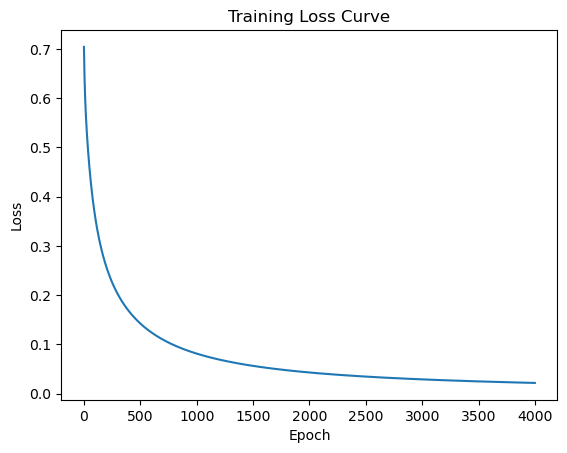

In [9]:
from typing import List
def plot_loss(loss_values: List[float]):
    plt.plot(loss_values)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss Curve')
    plt.show()
    
plot_loss(loss_values)

In [10]:
# Test the model on new data
test_input = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
test_output = model(test_input)
print(test_output)


tensor([[2.4534e-05],
        [2.5227e-02],
        [2.5227e-02],
        [9.6466e-01]], grad_fn=<SigmoidBackward0>)


In [11]:
output = (test_output > 0.5).float()
print(output)

tensor([[0.],
        [0.],
        [0.],
        [1.]])


In [12]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)


# 2. Create model save path 
MODEL_NAME = "01_pytorch_perceptron.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)


Saving model to: models\01_pytorch_perceptron.pth


In [13]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [14]:
from sklearn.datasets import make_circles


# Make 2000 samples 
n_samples = 2000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.05, # a little bit of noise to the dots
                    random_state=42) # keep random state so we get the same values

In [15]:
# Turn data into tensors
# Otherwise this causes issues with computations later on
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [16]:
print(f"Last 5 X features:\n{X[5:]}") #Wink wink numpy slicing
print(f"\Last 5 y labels:\n{y[5:]}")

Last 5 X features:
tensor([[-0.1930,  0.7703],
        [ 1.0001, -0.3373],
        [-0.1127, -0.8118],
        ...,
        [ 0.6222, -0.7182],
        [-0.7904,  0.1368],
        [ 0.5993,  0.5590]])
\Last 5 y labels:
tensor([1., 0., 1.,  ..., 0., 1., 1.])


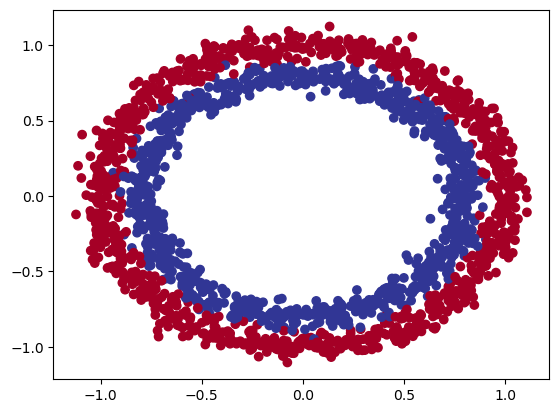

In [17]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0], 
            y=X[:, 1], 
            c=y, 
            cmap=plt.cm.RdYlBu);

In [18]:
# Print the shape of the dataset
print(f"Shape of X: {X.shape}")  # Should print (2000, 2)

# Print the second dimension of X
print(f"Second dimension (number of features): {X.shape[1]}")  # Should print 2

# Print some sample values
print("First 5 values of X:\n", X[:5])
print("First 5 values of y:\n", y[:5])


Shape of X: torch.Size([2000, 2])
Second dimension (number of features): 2
First 5 values of X:
 tensor([[ 0.4452, -0.5584],
        [-0.6263,  0.8151],
        [-0.4009,  0.7175],
        [ 0.8309, -0.6262],
        [-0.1443,  0.7514]])
First 5 values of y:
 tensor([1., 0., 1., 0., 1.])


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Convert NumPy arrays to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float)
X_test = torch.tensor(X_test, dtype=torch.float)
y_train = torch.tensor(y_train, dtype=torch.float)
y_test = torch.tensor(y_test, dtype=torch.float)

# Print shapes to verify
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: torch.Size([1600, 2])
X_test shape: torch.Size([400, 2])
y_train shape: torch.Size([1600])
y_test shape: torch.Size([400])


C:\Users\alex_\AppData\Local\Temp\ipykernel_17596\3072337304.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float)
C:\Users\alex_\AppData\Local\Temp\ipykernel_17596\3072337304.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float)
C:\Users\alex_\AppData\Local\Temp\ipykernel_17596\3072337304.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.float)
C:\Users\alex_\AppData\Local\Temp\ipykernel_17596\307

In [48]:
import torch
import torch.nn as nn
import torch.optim as optim

class TwoLayerPerceptron(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(TwoLayerPerceptron, self).__init__()
        self.linear1 = nn.Linear(input_dim, hidden_dim)
        self.linear2 = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        x = self.linear1(x)
        x = self.linear2(x)
        return x  # No activation function

# Define input size, hidden size, and output size
input_size = 2  # Since make_circles() generates 2D points
hidden_size = 5  # Can be adjusted
output_size = 1  # Binary classification

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = TwoLayerPerceptron(input_size, hidden_size, output_size).to(device)

loss_function = nn.BCEWithLogitsLoss() 
optimizer = optim.SGD(model.parameters(), lr=0.1)

print(model)


TwoLayerPerceptron(
  (linear1): Linear(in_features=2, out_features=5, bias=True)
  (linear2): Linear(in_features=5, out_features=1, bias=True)
)


In [49]:
model_circle = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_circle

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [50]:
X_test, y_test = X_test.to(device), y_test.to(device)

model.eval()

with torch.no_grad():
    logits = model(X_test)  
    predictions = torch.sigmoid(logits)  
    predicted_classes = (predictions > 0.5).float()

accuracy = (predicted_classes == y_test).float().mean().item()
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 49.25%


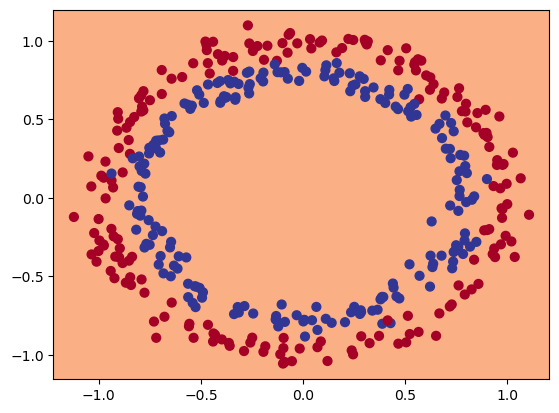

In [51]:
plot_decision_boundary(model, X_test, y_test)


In [52]:
num_epochs = 100
loss_curve = []
acc_curve = []

X_train, y_train = X_train.to(device), y_train.to(device)

for epoch in range(num_epochs):
    model.train()
    
    # Forward pass
    logits = model(X_train)
    loss = loss_function(logits, y_train.unsqueeze(1))  

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Every 10 epochs: evaluate and log
    if (epoch + 1) % 10 == 0:
        with torch.no_grad():
            preds = torch.sigmoid(logits)
            predicted_classes = (preds > 0.5).float()
            accuracy = (predicted_classes == y_train.unsqueeze(1)).float().mean().item()
            
            loss_curve.append(loss.item())
            acc_curve.append(accuracy)
            
            print(f"Epoch [{epoch + 1}/{num_epochs}] | Loss: {loss.item():.4f} | Accuracy: {accuracy * 100:.2f}%")


Epoch [10/100] | Loss: 0.6983 | Accuracy: 44.37%
Epoch [20/100] | Loss: 0.6959 | Accuracy: 45.75%
Epoch [30/100] | Loss: 0.6950 | Accuracy: 47.69%
Epoch [40/100] | Loss: 0.6944 | Accuracy: 47.94%
Epoch [50/100] | Loss: 0.6941 | Accuracy: 48.44%
Epoch [60/100] | Loss: 0.6939 | Accuracy: 48.63%
Epoch [70/100] | Loss: 0.6938 | Accuracy: 48.94%
Epoch [80/100] | Loss: 0.6937 | Accuracy: 48.88%
Epoch [90/100] | Loss: 0.6936 | Accuracy: 48.75%
Epoch [100/100] | Loss: 0.6935 | Accuracy: 48.94%


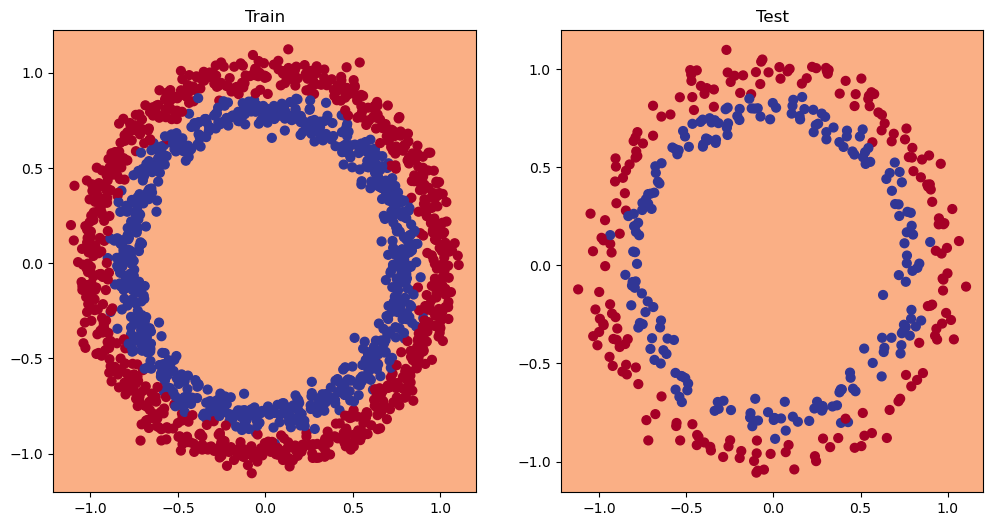

In [53]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_circle, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_circle, X_test, y_test)

In [54]:
# Create a toy tensor (similar to the data going into our model(s))
input_dummy = torch.arange(-10, 10, 1, dtype=torch.float32)
input_dummy

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

In [55]:
def relu(x):
  return torch.maximum(torch.tensor(0), x) # inputs must be tensors

# Pass toy tensor through ReLU function
relu(input_dummy)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

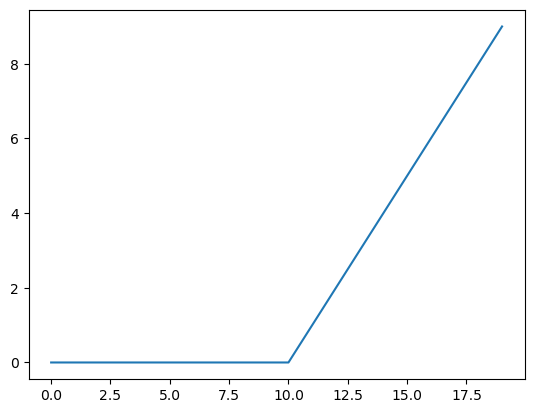

In [56]:
plt.plot(relu(input_dummy))

In [57]:
# Ex 6 Recreate the model with some none linear activation functions
import torch
import torch.nn as nn
import torch.optim as optim

class NonLinearPerceptron(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(NonLinearPerceptron, self).__init__()
        self.linear1 = nn.Linear(input_dim, hidden_dim)
        self.activation = nn.ReLU()
        self.linear2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.linear1(x)
        x = self.activation(x)
        x = self.linear2(x)
        return x  # No sigmoid here, we'll use BCEWithLogitsLoss


input_dim = 2
hidden_dim = 5
output_dim = 1

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = NonLinearPerceptron(input_dim, hidden_dim, output_dim).to(device)

loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

num_epochs = 100
loss_curve = []
acc_curve = []

X_train, y_train = X_train.to(device), y_train.to(device)

for epoch in range(num_epochs):
    model.train()
    
    logits = model(X_train)
    loss = loss_fn(logits, y_train.unsqueeze(1))  # Shape: [N, 1]

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        with torch.no_grad():
            preds = torch.sigmoid(logits)
            predicted_classes = (preds > 0.5).float()
            accuracy = (predicted_classes == y_train.unsqueeze(1)).float().mean().item()
            
            loss_curve.append(loss.item())
            acc_curve.append(accuracy)
            
            print(f"Epoch [{epoch + 1}/{num_epochs}] | Loss: {loss.item():.4f} | Accuracy: {accuracy * 100:.2f}%")



Epoch [10/100] | Loss: 0.7121 | Accuracy: 50.19%
Epoch [20/100] | Loss: 0.7023 | Accuracy: 47.25%
Epoch [30/100] | Loss: 0.6983 | Accuracy: 47.62%
Epoch [40/100] | Loss: 0.6964 | Accuracy: 48.00%
Epoch [50/100] | Loss: 0.6953 | Accuracy: 48.81%
Epoch [60/100] | Loss: 0.6947 | Accuracy: 49.50%
Epoch [70/100] | Loss: 0.6942 | Accuracy: 49.81%
Epoch [80/100] | Loss: 0.6937 | Accuracy: 50.06%
Epoch [90/100] | Loss: 0.6934 | Accuracy: 50.06%
Epoch [100/100] | Loss: 0.6931 | Accuracy: 50.06%


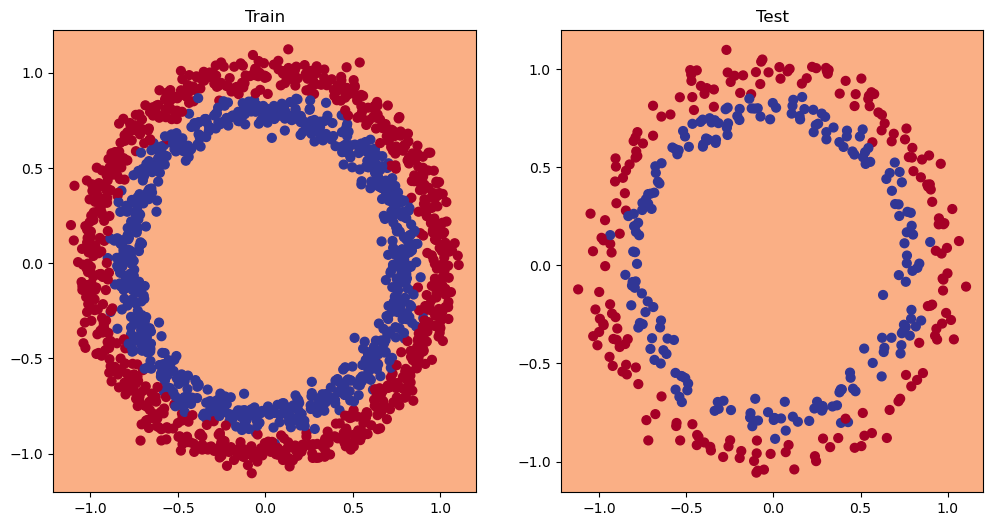

In [58]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_circle, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_circle, X_test, y_test)

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


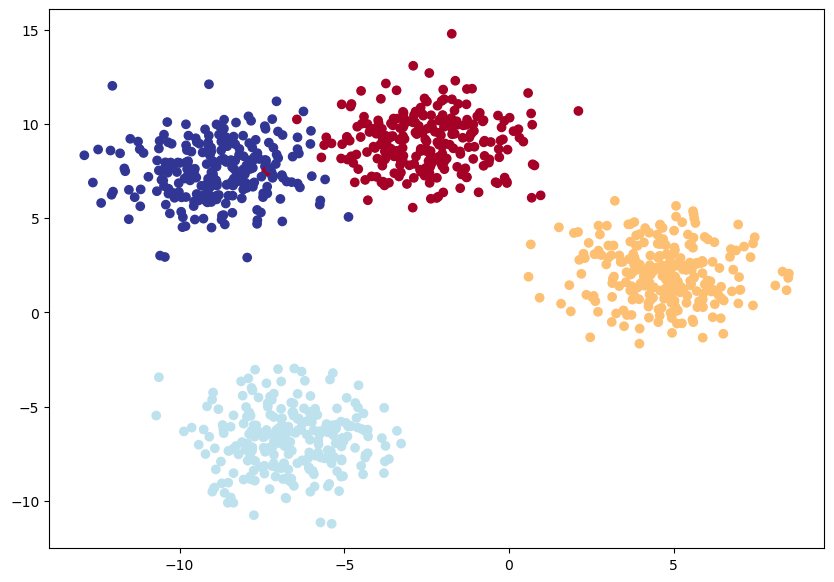

In [59]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels 
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

In [34]:
import torch.nn as nn

class LinearClassifier(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearClassifier, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.linear(x)  # raw logits
        
# Define input and output dimensions
input_dim = NUM_FEATURES  # 2
output_dim = NUM_CLASSES  # 4

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize model, loss, and optimizer
model = LinearClassifier(input_dim, output_dim).to(device)

loss_fn = nn.CrossEntropyLoss()  # For multi-class classification
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)


In [35]:
# Move data to device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)

# Training settings
epochs = 100
loss_curve = []
acc_curve = []

for epoch in range(epochs):
    model.train()

    # Forward pass
    logits = model(X_blob_train)
    loss = loss_fn(logits, y_blob_train)

    # Backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        # Calculate accuracy
        with torch.no_grad():
            preds = torch.argmax(logits, dim=1)
            acc = (preds == y_blob_train).float().mean().item()

        loss_curve.append(loss.item())
        acc_curve.append(acc)
        
        print(f"Epoch [{epoch+1}/{epochs}] | Loss: {loss.item():.4f} | Accuracy: {acc * 100:.2f}%")


Epoch [10/100] | Loss: 0.2140 | Accuracy: 98.62%
Epoch [20/100] | Loss: 0.1510 | Accuracy: 99.00%
Epoch [30/100] | Loss: 0.1227 | Accuracy: 98.87%
Epoch [40/100] | Loss: 0.1059 | Accuracy: 98.87%
Epoch [50/100] | Loss: 0.0946 | Accuracy: 98.87%
Epoch [60/100] | Loss: 0.0864 | Accuracy: 98.87%
Epoch [70/100] | Loss: 0.0802 | Accuracy: 98.87%
Epoch [80/100] | Loss: 0.0752 | Accuracy: 98.87%
Epoch [90/100] | Loss: 0.0711 | Accuracy: 98.87%
Epoch [100/100] | Loss: 0.0677 | Accuracy: 98.87%


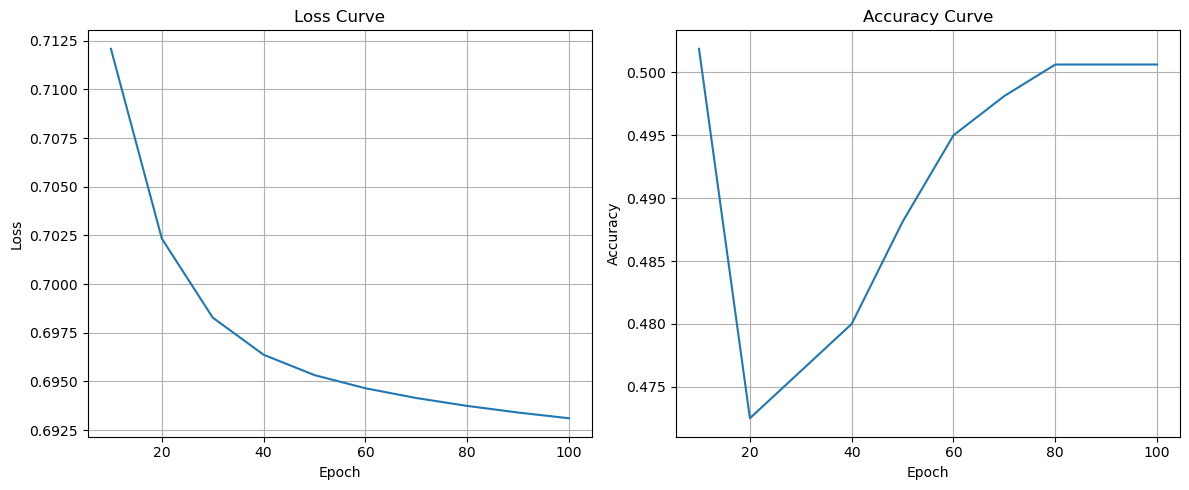

In [61]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(10, epochs + 1, 10), loss_curve)
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(10, epochs + 1, 10), acc_curve)
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)

plt.tight_layout()
plt.show()


Epoch [10/200] | Train Loss: 0.4587 | Train Acc: 78.67% | Val Loss: 0.3006 | Val Acc: 94.38%
Epoch [20/200] | Train Loss: 0.4323 | Train Acc: 80.39% | Val Loss: 0.2784 | Val Acc: 93.44%
Epoch [30/200] | Train Loss: 0.4405 | Train Acc: 80.94% | Val Loss: 0.2580 | Val Acc: 93.12%
Epoch [40/200] | Train Loss: 0.4025 | Train Acc: 81.25% | Val Loss: 0.2251 | Val Acc: 95.63%
Epoch [50/200] | Train Loss: 0.4314 | Train Acc: 79.61% | Val Loss: 0.2124 | Val Acc: 97.81%
Epoch [60/200] | Train Loss: 0.3925 | Train Acc: 83.20% | Val Loss: 0.2300 | Val Acc: 93.12%
Epoch [70/200] | Train Loss: 0.4138 | Train Acc: 81.88% | Val Loss: 0.1959 | Val Acc: 96.25%
Epoch [80/200] | Train Loss: 0.3715 | Train Acc: 83.75% | Val Loss: 0.1774 | Val Acc: 97.81%
Epoch [90/200] | Train Loss: 0.4012 | Train Acc: 81.88% | Val Loss: 0.1755 | Val Acc: 96.88%
Epoch [100/200] | Train Loss: 0.3524 | Train Acc: 85.55% | Val Loss: 0.1862 | Val Acc: 95.94%
Epoch [110/200] | Train Loss: 0.3637 | Train Acc: 83.59% | Val Loss: 

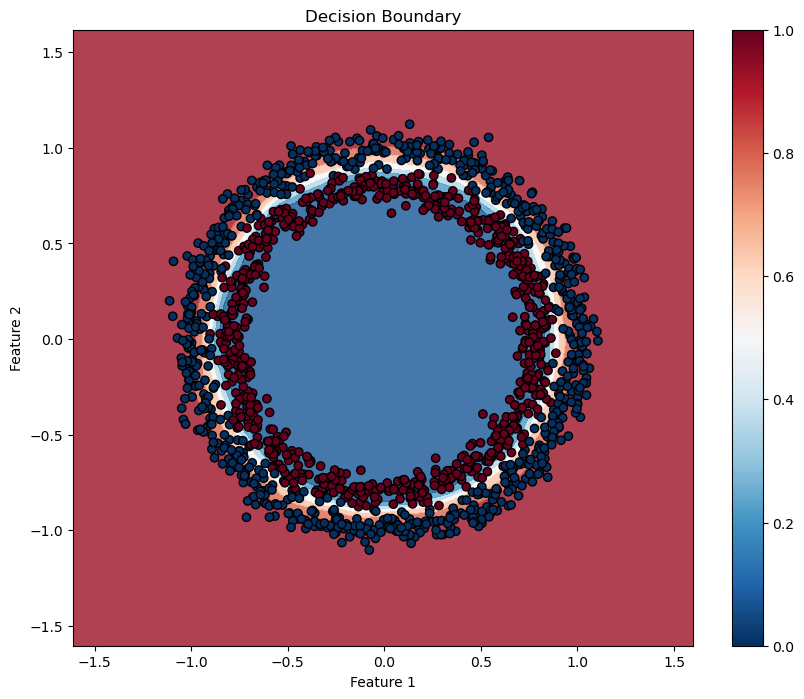

Final test accuracy: 97.50%


In [55]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

class ImprovedNeuralClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dims, output_dim, dropout_rate=0.2):
        super(ImprovedNeuralClassifier, self).__init__()
        
        # Create a list to hold all layers
        layers = []
        
        # Input layer to first hidden layer
        layers.append(nn.Linear(input_dim, hidden_dims[0]))
        layers.append(nn.BatchNorm1d(hidden_dims[0]))
        layers.append(nn.LeakyReLU(0.1))
        layers.append(nn.Dropout(dropout_rate))
        
        # Add additional hidden layers
        for i in range(len(hidden_dims)-1):
            layers.append(nn.Linear(hidden_dims[i], hidden_dims[i+1]))
            layers.append(nn.BatchNorm1d(hidden_dims[i+1]))
            layers.append(nn.LeakyReLU(0.1))
            layers.append(nn.Dropout(dropout_rate))
        
        # Output layer
        layers.append(nn.Linear(hidden_dims[-1], output_dim))
        
        # Combine all layers into a sequential model
        self.model = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.model(x)

# Setup parameters
input_dim = 2
hidden_dims = [16, 32, 16]  # Multiple hidden layers with more units
output_dim = 1
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Create model
model = ImprovedNeuralClassifier(input_dim, hidden_dims, output_dim, dropout_rate=0.2).to(device)

# Use Adam optimizer with learning rate scheduling
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-5)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=10, factor=0.5, verbose=True)

# Loss function
loss_fn = nn.BCEWithLogitsLoss()

# Training settings
num_epochs = 200  # More epochs
batch_size = 32   # Add batch training
early_stopping_patience = 20
best_loss = float('inf')
patience_counter = 0

# Training history
loss_curve = []
acc_curve = []
val_loss_curve = []
val_acc_curve = []

# Assuming X_train, y_train are available
# Add data loading and processing here
X_train, y_train = X_train.to(device), y_train.to(device)

# Split data into train and validation sets (80/20 split)
indices = torch.randperm(X_train.size(0))
train_size = int(X_train.size(0) * 0.8)
train_indices = indices[:train_size]
val_indices = indices[train_size:]

X_train_split = X_train[train_indices]
y_train_split = y_train[train_indices]
X_val = X_train[val_indices]
y_val = y_train[val_indices]

def train_batch(model, X, y, optimizer, loss_fn):
    model.train()
    batch_loss = 0
    batch_acc = 0
    
    # Create mini-batches
    permutation = torch.randperm(X.size(0))
    
    for i in range(0, X.size(0), batch_size):
        indices = permutation[i:i+batch_size]
        X_batch, y_batch = X[indices], y[indices]
        
        # Forward pass
        logits = model(X_batch)
        loss = loss_fn(logits, y_batch.unsqueeze(1))
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Track metrics
        batch_loss += loss.item() * X_batch.size(0)
        preds = torch.sigmoid(logits)
        predicted_classes = (preds > 0.5).float()
        batch_acc += (predicted_classes == y_batch.unsqueeze(1)).float().sum().item()
    
    # Return average loss and accuracy
    return batch_loss / X.size(0), batch_acc / X.size(0)

def evaluate(model, X, y, loss_fn):
    model.eval()
    with torch.no_grad():
        logits = model(X)
        loss = loss_fn(logits, y.unsqueeze(1))
        preds = torch.sigmoid(logits)
        predicted_classes = (preds > 0.5).float()
        accuracy = (predicted_classes == y.unsqueeze(1)).float().mean().item()
    return loss.item(), accuracy

# Training loop
for epoch in range(num_epochs):
    # Train
    train_loss, train_acc = train_batch(model, X_train_split, y_train_split, optimizer, loss_fn)
    
    # Evaluate
    val_loss, val_acc = evaluate(model, X_val, y_val, loss_fn)
    
    # Update learning rate
    scheduler.step(val_loss)
    
    # Track metrics
    loss_curve.append(train_loss)
    acc_curve.append(train_acc)
    val_loss_curve.append(val_loss)
    val_acc_curve.append(val_acc)
    
    # Print progress
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}] | "
              f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc * 100:.2f}% | "
              f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc * 100:.2f}%")
    
    # Early stopping
    if val_loss < best_loss:
        best_loss = val_loss
        patience_counter = 0
        # Save the best model
        torch.save(model.state_dict(), 'best_model.pth')
    else:
        patience_counter += 1
        # if patience_counter >= early_stopping_patience:
        #     print(f"Early stopping at epoch {epoch + 1}")
        #     break

# Load the best model
model.load_state_dict(torch.load('best_model.pth'))

# Function to visualize decision boundary
def plot_decision_boundary(model, X, y):
    model.eval()
    
    # Convert tensors to numpy arrays for plotting
    X_np = X.cpu().numpy()
    y_np = y.cpu().numpy()
    
    # Define the mesh grid
    x_min, x_max = X_np[:, 0].min() - 0.5, X_np[:, 0].max() + 0.5
    y_min, y_max = X_np[:, 1].min() - 0.5, X_np[:, 1].max() + 0.5
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Make predictions on the mesh grid
    with torch.no_grad():
        grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32).to(device)
        Z = model(grid)
        Z = torch.sigmoid(Z).cpu().numpy()
    
    # Reshape the predictions
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
    
    # Plot the training points
    plt.scatter(X_np[:, 0], X_np[:, 1], c=y_np, cmap=plt.cm.RdBu_r, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.colorbar()
    plt.savefig('decision_boundary.png')
    plt.show()
    
    # Final test accuracy
    _, accuracy = evaluate(model, X, y, loss_fn)
    print(f"Final test accuracy: {accuracy * 100:.2f}%")

# Plot the decision boundary
plot_decision_boundary(model, X_train, y_train)